# Distributions in Pandas
------

- Distribution means: Set of all possible random variables.
- Example:
 - Flipping a **coin** for heads and tails
 - A **binomial distribution** (two possible outcomes)
 - Discrete (categories of heads an tails, no real numbers)
 - Evenle weighted (heads are just as likely as tails)

In [2]:
import pandas as pd
import numpy as np

- `numpy` actually has some distributions built into it allowing us to make random flips of a coin with given parameters. 
- Here we ask for a number from the `numpy` binomial distribution. We have two parameters to pass in. The first is the number of times we want it to run. The second is the chance we get a zero, which we will use to represent heads here. 

In [ ]:
np.random.binomial(1, 0.5)

- What if we run the simulation a thousand times and divided the result by a thousand. Well you see a number pretty close to 0.5 which means half of the time we had a heads and half of the time we had a tails. 

In [ ]:
np.random.binomial(1000, 0.5) / 1000

- We can also have unevenly weighted binomial distributions. For instance what's the chance that there will be a tornado today? It is pretty low. So maybe there is a hundredth of a percentage chance. 
- We can put this into a binomial distribution as a weighting in NumPy. If we run this 100,000 times we see there are pretty minimal tornado events. 

In [ ]:
chance_of_tornado = 0.01 / 100
np.random.binomial(100000, chance_of_tornado)

- Let's take one more example. Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year. And lets say if there's a tornado I'm going to get away from the windows and hide, then come back and do my recording the next day. So what's the chance of this happening two days in a row?  

$~$

- Here we create an empty list and we create a number of potential tornado events by asking the NumPy binomial function using our chance of tornado. We'll do this a million times which is just shy of 3,000 years worth of events. 
- This process is called sampling the distribution. 
- Now we can write a little loop to go through the list and look for any two adjacent pairs of ones which means that there were two days that had back to back tornadoes. 

In [ ]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)

two_days_in_a_row = 0

for j in range(1, len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row += 1
        
print(f'{two_days_in_a_row} tornadoes back to back in {1000000/365}')

- Many of the distributions you use in data science are not discrete binomial, and instead are continues where the value of the given observation isn't a category like heads or tails, but can be represented by a real number. 
- It's common to then graph these distributions when talking about them, where the x axis is the value of the observation and the y axis represents the probability that a given observation will occur.  
- If all numbers are equally likely to be drawn when you sample from it, this should be graphed as a flat horizontal line. And this flat line is actually called the **uniform distribution**.  
$~$

- There are few other distributions that get a lot more interesting. Let's take the **normal distribution** which is also called **Gaussian Distribution** or sometimes, a **Bell Curve**. 
- This distribution looks like a hump where the number which has the highest probability of being drawn is a zero, and there are two decreasing curves on either side of the X axis. 
- One of the properties of this distribution is that the mean is zero, not the two curves on either side are symmetric. 

In [3]:
np.random.uniform(0, 1)

0.17922765948034847

In [4]:
np.random.normal(0.75)

2.604407935725912

- I want to introduce you to the term **expected value**. 
- I think that most of us are familiar with the mean is the sum of all the values divided by the total number of values. 
- The **expected value** is the probability from the underlying distribution,it is what would be the mean of a die roll if we did an infinite number of rolls. The result is 3.5 since each face of the die is equally likely to appear. Thus the expected value is 3.5, while the mean value depends upon the samples that we've taken, and converges to the expected value given a sufficiently large sample set.     
<br></br>
- A second property is  **variance**. Variance is a measure of how broadly values of samples are spread out from the mean.

- Let's get a little bit more formal about five different characteristics of distributions.

 - First, we can talk about the **distribution central tendency**, and the measures we would use for this are **mode**, **median**, or **mean**. This characteristic is really about where the bulk of probability is in the distribution.
 - We can also talk about the **variability** in the distribution. The **standard deviation**,and the **interquartile range**. The standard deviation is simply a measure of how different each item, in our sample, is from the mean. 

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [3]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9834749730975918

In [4]:
np.std(distribution)

0.9834749730975918

-                                                                      
 - There are a couple of more measures of distribution that are interesting to talk about. One of these is the shape of the tales of the distribution and this is called the **kurtosis**. 
 - We can measure the kurtosis using the statistics functions in the **scipy** package.
 - A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. 
 - Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution. 

In [5]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.2072001385442248

- We could also move out of the normal distributions and push the peak of the curve one way or the other. And this is called the **skew**. 
- If we test our current sample data, we see that there isn't much of a skew. 

In [6]:
stats.skew(distribution)

0.03689670558443471

- Let's switch distributions and take a look at a distribution called the **Chi Squared** distribution, which is also quite commonly used in statistic. 
- The **Chi Squared** Distribution has only one parameter called the **degrees of freedom**. 
- The degrees of freedom is closely related to the number of samples that you take from a normal population. It's important for significance testing.
- But what I would like you to observe, is that as the degrees of freedom increases, the shape of the Chi Squared distribution changes. In particular, the skew to the left begins to move towards the center. We can observe this through simulation. 

- First we'll sample 1,000 values from a Chi Squared distribution with degrees of freedom 2. Now we can see that the skew is quite large. Now if we re-sample changing degrees of freedom to 5. We see that the skew has decreased significantly. 

In [11]:
chi_squared_df_2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df_2)

2.046300739654259

In [12]:
chi_squared_df_5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df_5)

1.300833524755811

- We can actually plot this right in the Jupiter notebook.
- You can see a histogram with our plot with the two degrees of freedom is skewed much further to the left, while our plot with the five degrees of freedom is not as highly skewed. 

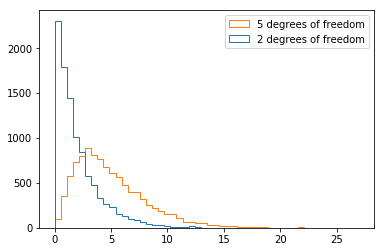

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df_2, chi_squared_df_5], bins=50, histtype='step',
                 label=['2 degrees of freedom', '5 degrees of freedom'])

plt.legend(loc='upper right')

- 
 - The last aspect of distributions that I want to talk about is the **modality**.
 - So far, all of the distributions I've shown have a single high point, a peak. But what if we have multiple peaks? 
 - This distribution has two high points, so we call it **bimodal**. These are really interesting distributions and happen regularly in data mining. a useful insight is that we can actually model these using two normal distributions with different parameters. These are called **Gaussian Mixture Models** and are particularly useful when clustering data. 